In [1]:
import pandas as pd

# Load datasets
comments_df = pd.read_csv(r"C:\Users\rakes\Downloads\archive (10)\comments.csv")
follows_df = pd.read_csv(r"C:\Users\rakes\Downloads\archive (10)\follows.csv")
likes_df = pd.read_csv(r"C:\Users\rakes\Downloads\archive (10)\likes.csv")
photos_df = pd.read_csv(r"C:\Users\rakes\Downloads\archive (10)\photos.csv")
users_df = pd.read_csv(r"C:\Users\rakes\Downloads\archive (10)\users.csv")
tags_df = pd.read_csv(r"C:\Users\rakes\Downloads\archive (10)\tags.csv")

# Display sample data
print(comments_df.head())
print(users_df.info())


   id                 comment  User  id  Photo id created Timestamp  \
0   1         unde at dolorem         2         1  13-04-2023 08:04   
1   2         quae ea ducimus         3         1  13-04-2023 08:04   
2   3      alias a voluptatum         5         1  13-04-2023 08:04   
3   4    facere suscipit sunt        14         1  13-04-2023 08:04   
4   5  totam eligendi quaerat        17         1  13-04-2023 08:04   

  posted date emoji used  Hashtags used count  
0    April 14        yes                    1  
1    April 14         no                    2  
2    April 14         no                    4  
3    April 14        yes                    2  
4    April 14        yes                    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               100 non-null    int64 
 1   name             100 non-null    object
 2

In [3]:
# Convert timestamps to datetime format
comments_df['created Timestamp'] = pd.to_datetime(comments_df['created Timestamp'])
follows_df['created time'] = pd.to_datetime(follows_df['created time'])
likes_df['created time'] = pd.to_datetime(likes_df['created time'])

# Fill missing values
comments_df.fillna("", inplace=True)


In [4]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"

# Apply sentiment analysis on comments
comments_df['Sentiment'] = comments_df['comment'].apply(get_sentiment)

# Sentiment distribution
print(comments_df['Sentiment'].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...


Sentiment
Neutral     7408
Negative      80
Name: count, dtype: int64


In [8]:
# Check unique values in 'is follower active'
print(follows_df['is follower active'].unique())

# Count of 'Yes' and 'No' values
print(follows_df['is follower active'].value_counts())

# Check for missing values
print(follows_df['is follower active'].isna().sum())


[1 0]
is follower active
1    4197
0    3426
Name: count, dtype: int64
0


In [13]:
# Count active followers correctly
active_followers = follows_df[follows_df['is follower active'] == 1].shape[0]
total_followers = follows_df.shape[0]

# Engagement Rate Calculation
engagement_rate = (active_followers / total_followers) * 100
print(f"Engagement Rate: {engagement_rate:.2f}%")


Engagement Rate: 55.06%


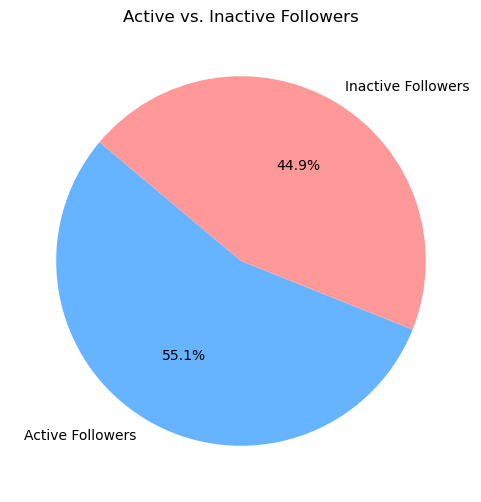

In [14]:
import matplotlib.pyplot as plt

labels = ["Active Followers", "Inactive Followers"]
sizes = [active_followers, total_followers - active_followers]
colors = ["#66b3ff", "#ff9999"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Active vs. Inactive Followers")
plt.show()


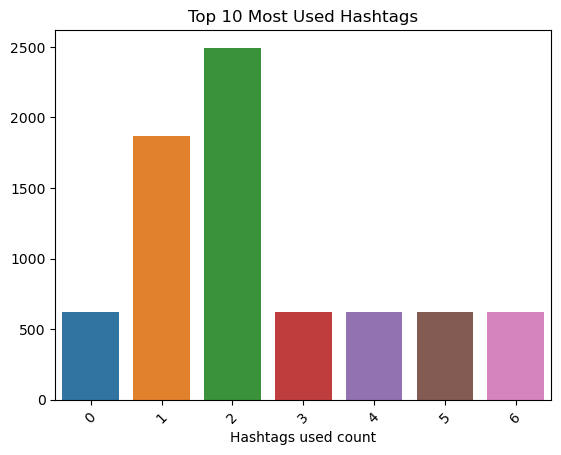

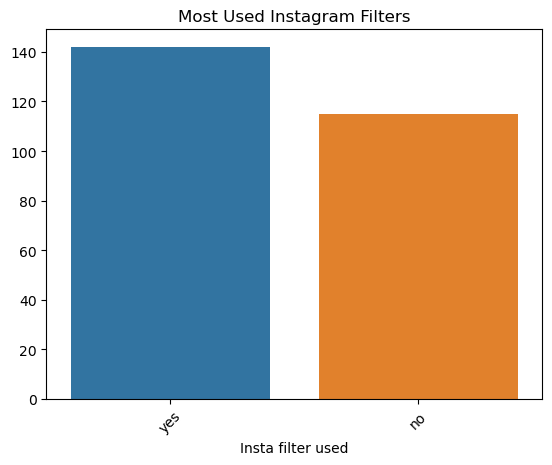

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top hashtags
top_hashtags = comments_df['Hashtags used count'].value_counts().head(10)
sns.barplot(x=top_hashtags.index, y=top_hashtags.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Used Hashtags")
plt.show()

# Most used Instagram filters
top_filters = photos_df['Insta filter used'].value_counts().head(10)
sns.barplot(x=top_filters.index, y=top_filters.values)
plt.xticks(rotation=45)
plt.title("Most Used Instagram Filters")
plt.show()


In [17]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 330.3 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/299.9 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/299.9 kB 245.8 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/299.9 kB 238.1 kB/s eta 0:00:02
   --------------- ---------------------- 122.9/299.9 kB 514.3 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/299.9 kB 962.4 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 975.4 kB/s eta 0:00:00


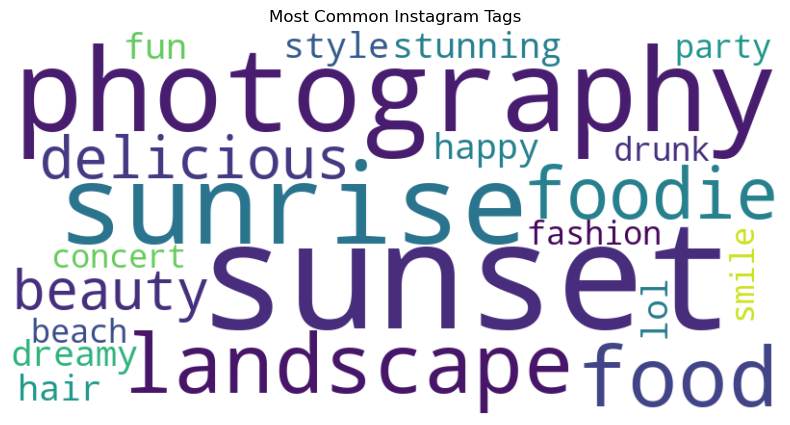

In [18]:
from wordcloud import WordCloud

tags_text = " ".join(tags_df['tag text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Instagram Tags")
plt.show()
